In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#veri setinin bulunduğu csv dosyasını çekeriz

In [3]:
path="C:/Users/HP/Desktop/Yapay Zeka Kursu Çalışmaları/data/CC GENERAL.csv"
data=pd.read_csv(path)

In [4]:
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.shape#veri seti 18 sütun 8950 satırdan oluşur

(8950, 18)

In [6]:
#elimizdeki verinin içeriğine bakmak için info kullanıyoruz.
#Buna göre elimizdeki verisetinde 3 değişken tipi bulunduğu net bir şekilde anlaşılmaktadır.Bunlar sırasıyla "object","float64" ve "int64" tür.
#Alt kısmında hepsinden kaç tane olduğuda mevcuttur.
#Bunun dışında  MINIMUM_PAYMENTS ve CREDIT_LIMIT içerisinde nan değerler olduğu görülmektedir.

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [143]:
#Şimdi ise bütün değerlerin ortalamalarını,medyanınını vs. detaylı inceleyelim

In [144]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950.0,NaN,NaN,NaN,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,NaN,NaN,NaN,592.437371,1659.887917,0.0,0.0,38.0,577.405,40761.25
INSTALLMENTS_PURCHASES,8950.0,NaN,NaN,NaN,411.067645,904.338115,0.0,0.0,89.0,468.6375,22500.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.490351,0.401371,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.202458,0.298336,0.0,0.0,0.083333,0.3,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN,NaN,NaN,0.364437,0.397448,0.0,0.0,0.166667,0.75,1.0


In [145]:
#Bu noktada CUST_ID' nin unique bir sütun olduğunu daha detaylı görmüş olduk.
#Bu nedenle bu sütunu veriseti içerisinden çıkarmamız gerektiğini anlamış bulunmaktayız.
#Bunun dışında veriseti içerisindeki tekrarlayan değerlerin olup olmadığına da bakalım.
#Eğer tekrarlayan değerler varsa onları unique bir hale getirmemiz gerekmektedir.

In [146]:
data.duplicated().sum() #tekrar eden değer yokmuş 

0

In [147]:
#Şimdi ise unique olan sütunu temizlemeye geldik

In [148]:
#Artık CUST_ID' nin olmadığını görebiliyoruz.

In [149]:
yeni_data = data.drop('CUST_ID', axis = 1)   
yeni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [150]:
#Aykırı değerler, örnek veri kümesinin genel modelinden farklı olan gözlemlerdir. 
#Wikipedia bunu 'diğer gözlemlerden uzak bir gözlem noktası' olarak tanımlıyor. 
#ML algoritmaları aykırı değerlerin varlığında iyi çalışmaz.
#Şimdi, verilen veri setimizin bir kutu grafiği kullanarak herhangi bir aykırı değer içerip içermediğini görelim.



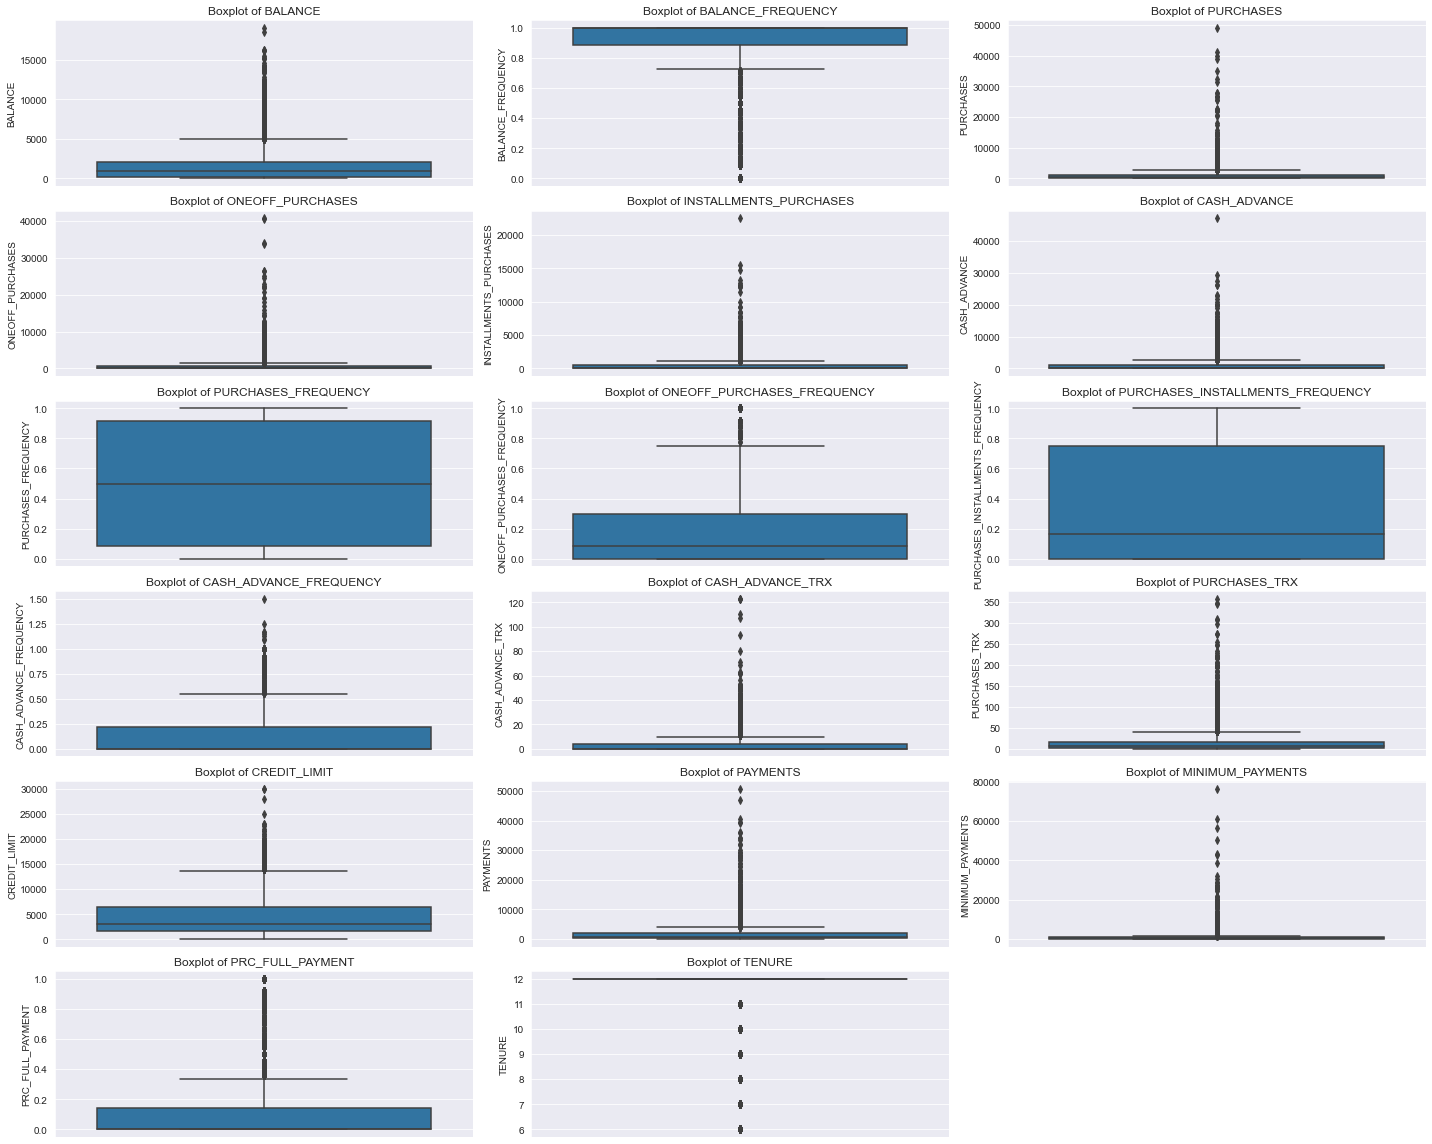

In [151]:
plt.figure(figsize = (20,16))
Features = yeni_data.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = yeni_data[Features[i]], data = yeni_data)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [152]:
#Aykırı Değerler, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY dışındaki tüm alanlarda mevcuttur.

#Çeyreklerini ve çeyrekler arası aralığını (IQR) kullanarak her özellik için aykırı değerleri sayın.
#Bir değer, (birinci çeyrek - 1.5 IQR) değerinden küçük veya (üçüncü çeyrek + 1.5 IQR) değerinden büyükse aykırı değer olarak kabul edilir.

In [153]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [154]:
Feature_list = yeni_data.columns
for i in Feature_list:
    lr, ur = detect_outliers(yeni_data[i])
    yeni_data[i] = np.where(yeni_data[i] > ur, ur,yeni_data[i])
    yeni_data[i] = np.where(yeni_data[i] < lr, lr,yeni_data[i])

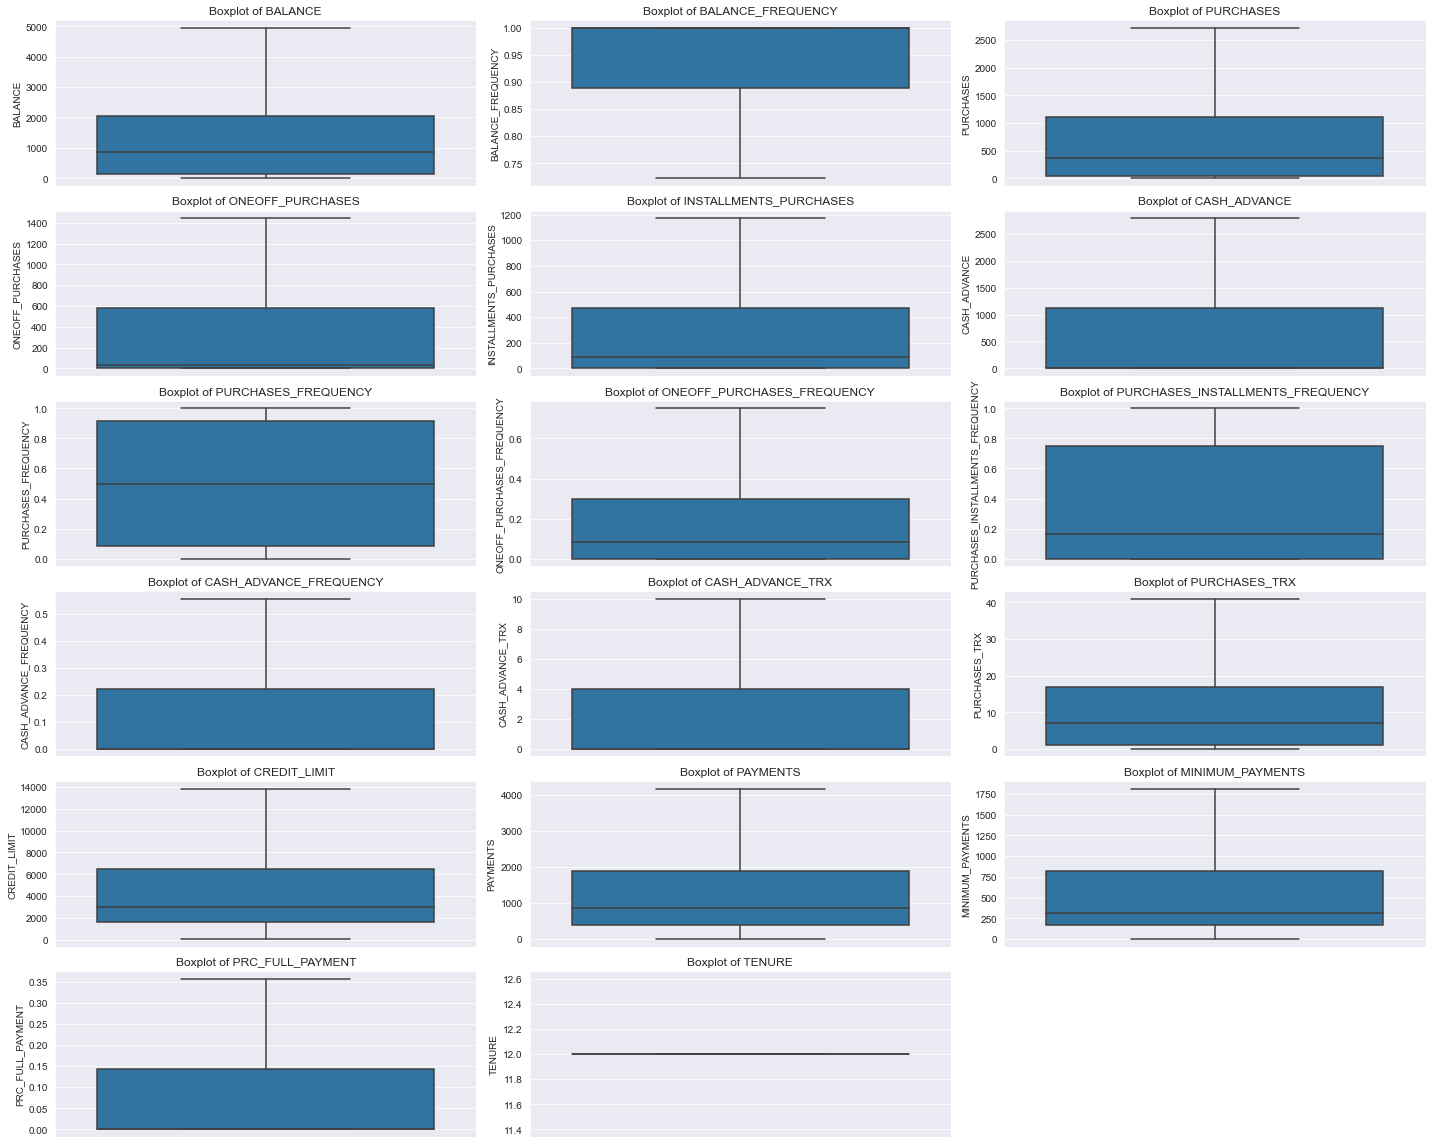

In [155]:
plt.figure(figsize = (20,16))
Features = yeni_data.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = yeni_data[Features[i]], data = yeni_data)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [156]:
#veriseti içerisindeki nan değerlere bakalım.

In [157]:
yeni_data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [158]:
#

In [159]:
yeni_data=yeni_data.fillna(0)

In [160]:
yeni_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [161]:
#Verilerin birbiriyle fazla ilişkili olması, analizimizi saptırabilir. 
#Bu yüzden korelasyonuna bakıyoruz.
#Koyu bölgeler değişkenlerin birbiriyle daha fazla ilişkili olduğunu gösteriyor.

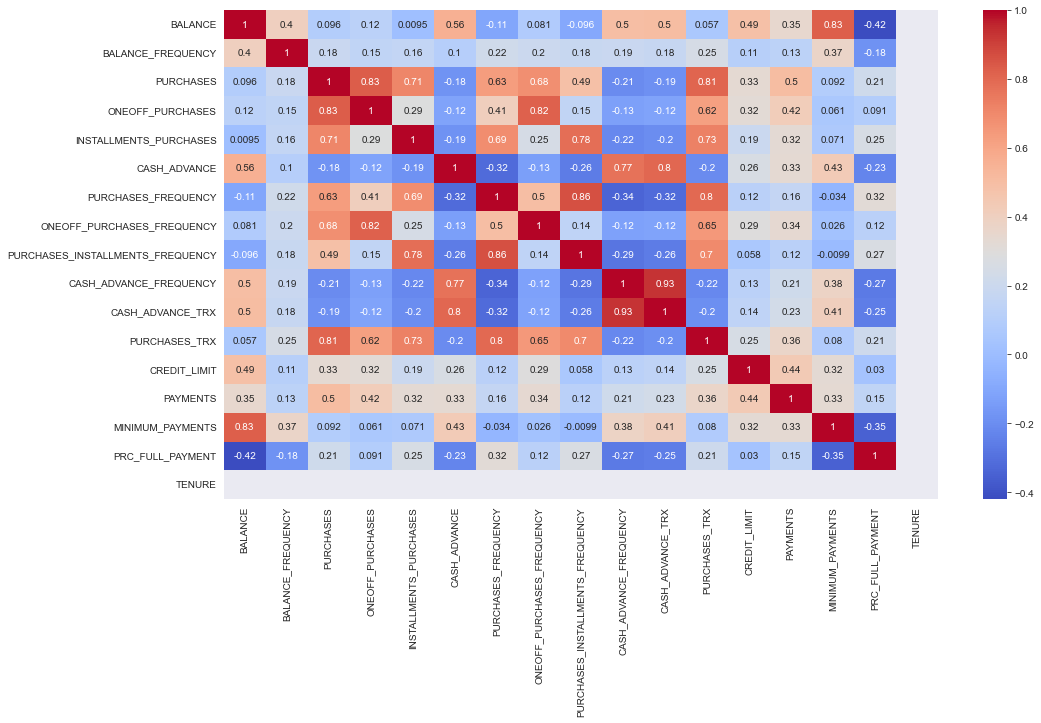

In [163]:
corr = yeni_data.corr()
plt.figure(figsize=(16,9))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm")


In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
zscore = StandardScaler() 
zscore.fit(yeni_data)
yeni_data_scaled= pd.DataFrame(zscore.transform(yeni_data),columns = yeni_data.columns)
yeni_data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-8.891708e-17,1.000056,-0.904424,-0.820986,-0.336351,0.431643,2.310587
BALANCE_FREQUENCY,8950.0,-1.244839e-15,1.000056,-1.886552,-0.384745,0.616459,0.616459,0.616459
PURCHASES,8950.0,1.460781e-16,1.000056,-0.838160,-0.793093,-0.427374,0.424090,2.249864
ONEOFF_PURCHASES,8950.0,-4.445854e-17,1.000056,-0.692383,-0.692383,-0.618135,0.435813,2.128108
INSTALLMENTS_PURCHASES,8950.0,1.238488e-16,1.000056,-0.746029,-0.746029,-0.521371,0.436923,2.211351
CASH_ADVANCE,8950.0,5.874878e-17,1.000056,-0.673507,-0.673507,-0.673507,0.442033,2.115343
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,-6.351220e-18,1.000056,-0.722749,-0.722749,-0.396788,0.450714,2.210909
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,0.970151,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.841854e-16,1.000056,-0.730084,-0.730084,-0.730084,0.556915,2.487414


In [166]:
from sklearn.cluster import KMeans

In [167]:
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(yeni_data_scaled)
    wss.append(k_means.inertia_)
    print(f"The inertia of {i} clusters : {k_means.inertia_}")

The inertia of 1 clusters : 143200.0
The inertia of 2 clusters : 109512.6423596911
The inertia of 3 clusters : 87520.64938452817
The inertia of 4 clusters : 76752.35895614837
The inertia of 5 clusters : 70459.07309134738
The inertia of 6 clusters : 65299.3201548672
The inertia of 7 clusters : 61195.46817487771
The inertia of 8 clusters : 57801.73657382095
The inertia of 9 clusters : 54990.17088338462
The inertia of 10 clusters : 52820.80131397072


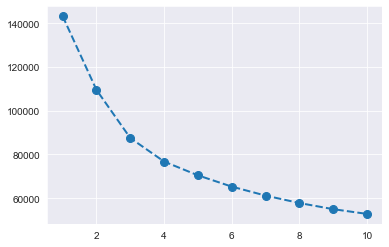

In [168]:
plt.plot(range(1,11),wss, marker='o', linestyle='dashed',linewidth=2, markersize=8);

In [169]:
#Yukarıdaki grafikten, küme = 1'den küme = 4'e kadar  keskin bir düşüş olduğunu görebiliriz, Dolayısıyla 3 veya 4 küme seçebiliriz. Ancak, 10'a kadar olan kümeler için silhouette_score'u doğrulayacağız.

In [170]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [171]:
sil_score = []
sil_width_min = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state = 123)
    k_means.fit(yeni_data_scaled)
    labels = k_means.labels_
    score = silhouette_score(yeni_data_scaled,labels, random_state = 123)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")
    min_width = silhouette_samples(yeni_data_scaled,labels).min()
    sil_width_min.append(min_width)
    print(f"The Silhouette Width of {i} clusters : {min_width}")

The Silhouette Score of 2 clusters : 0.233156048073744
The Silhouette Width of 2 clusters : -0.09281551356942497
The Silhouette Score of 3 clusters : 0.2373662903029046
The Silhouette Width of 3 clusters : -0.1206420716207328
The Silhouette Score of 4 clusters : 0.2101967767212029
The Silhouette Width of 4 clusters : -0.13014442569623752
The Silhouette Score of 5 clusters : 0.2020785396254329
The Silhouette Width of 5 clusters : -0.17901596797101355
The Silhouette Score of 6 clusters : 0.20464878223323807
The Silhouette Width of 6 clusters : -0.18380491134794866
The Silhouette Score of 7 clusters : 0.20764036478252845
The Silhouette Width of 7 clusters : -0.16388933253367965
The Silhouette Score of 8 clusters : 0.2028826811131387
The Silhouette Width of 8 clusters : -0.18864134739727026
The Silhouette Score of 9 clusters : 0.20108084493315612
The Silhouette Width of 9 clusters : -0.18264242365460281
The Silhouette Score of 10 clusters : 0.19871590608851714
The Silhouette Width of 10 cl

In [172]:
#Siluet_score, 3 küme sayısıyla en yüksek ve 9 ve 10 küme sayısıyla en düşüktür.
#Minimum siluet Genişliği, analizdeki tüm kümeler için tüm değerler negatiftir, minimum değer n = 9'da ve maksimum n = 2'dedir.

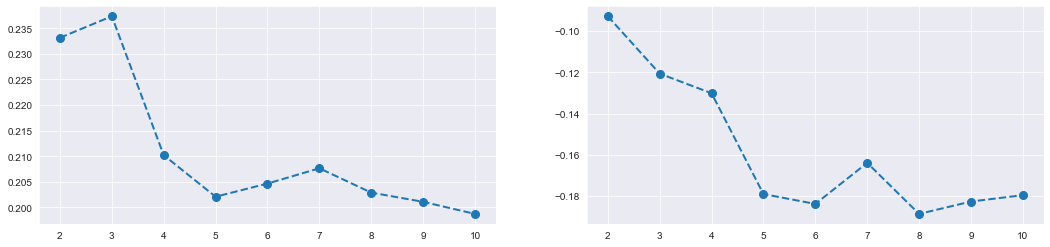

In [173]:
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
plt.plot(range(2,11),sil_score, marker='o', linestyle='dashed',linewidth=2, markersize=8);
plt.subplot(1,2,2)
plt.plot(range(2,11),sil_width_min, marker='o', linestyle='dashed',linewidth=2, markersize=8);

In [174]:
k_Means4 = KMeans(n_clusters = 3,random_state = 123)
k_Means4.fit(yeni_data_scaled,labels)
labels = k_Means4.labels_
yeni_data['Cluster_Labels_3'] = labels
yeni_data.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels_3
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.00,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.00,0.0,2784.552848,0.000000,0.00,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.75,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2


In [175]:
silhouette_score(yeni_data_scaled,labels,random_state = 123)

0.2373662903029046

In [176]:
sil_width = silhouette_samples(yeni_data_scaled,labels)
yeni_data['Sil_Width_3'] = sil_width
sil_width.min()

-0.1206420716207328

In [177]:
df_out = yeni_data.groupby(by = 'Cluster_Labels_3').sum()[['PURCHASES','PAYMENTS','TENURE']].reset_index()
df_out.head(3)

,Cluster_Labels_3,PURCHASES,PAYMENTS,TENURE
0,0,1.803759e+06,3.177799e+06,55188.0
1,1,5.325390e+05,4.008887e+06,27744.0
2,2,4.261189e+06,4.869717e+06,24468.0


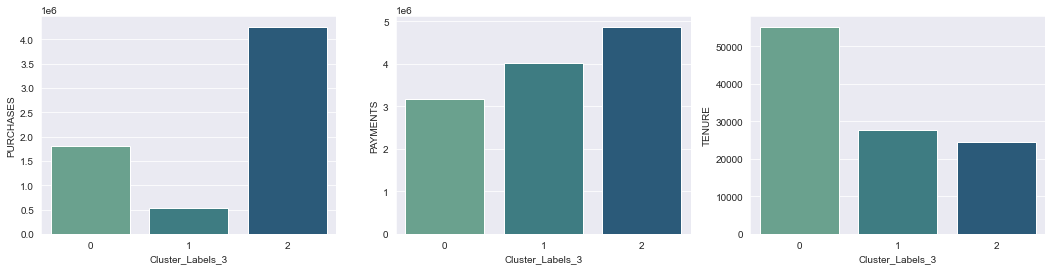

In [178]:
sns.set_style("darkgrid")
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'Cluster_Labels_3',y = 'PURCHASES', data = df_out, palette = 'crest', seed = 123);
plt.subplot(1,3,2)
sns.barplot(x= 'Cluster_Labels_3',y = 'PAYMENTS', data = df_out, palette = 'crest', seed = 123);
plt.subplot(1,3,3)
sns.barplot(x= 'Cluster_Labels_3',y = 'TENURE', data = df_out, palette = 'crest', seed = 123);

In [179]:
#Clutter 0 : Kullanım Süresi için en yüksek, Satın Almalar için orta, Ödemeler için en düşük tutarlardır.
#Clutter 1: Satın Almalar için en düşük, Kullanım Süresi ve Ödemeler için orta.
#Clutter 2: Satın Almalar ve Ödemeler için en yüksek, Görev Süresi için en düşüktür.

In [180]:
scaler = StandardScaler()

In [191]:
dataset=yeni_data

In [192]:
df = scaler.fit_transform(yeni_data)

In [193]:
df

array([[-0.87782104, -1.02187519, -0.72968709, ...,  0.        ,
        -0.87892468,  1.32856136],
       [ 1.1785459 , -0.2027079 , -0.83815959, ...,  0.        ,
         0.35212006,  0.34261491],
       [ 0.71848713,  0.61645939,  0.04095652, ...,  0.        ,
         1.58316479, -2.43272997],
       ...,
       [-0.88920486, -0.88535181, -0.67397271, ...,  0.        ,
        -0.87892468,  1.57111267],
       [-0.89567082, -0.88535181, -0.83815959, ...,  0.        ,
        -0.87892468,  0.57177375],
       [-0.66200474, -1.88655177,  0.40489651, ...,  0.        ,
        -0.87892468, -0.49568   ]])

In [194]:
from sklearn.cluster import KMeans

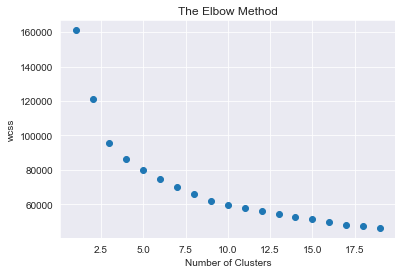

In [195]:

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20), wcss, 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [196]:
kmeans = KMeans(n_clusters = 10, init='k-means++', random_state=0)

In [197]:
y_kmeans = kmeans.fit_predict(df)

In [198]:
y_kmeans

array([1, 6, 0, ..., 3, 1, 0])

In [199]:
y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)

In [200]:
y_kmeans.shape

(8950, 1)

In [201]:
b = np.concatenate((y_kmeans, dataset), axis=1)

In [202]:
dataset.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster_Labels_3', 'Sil_Width_3'],
      dtype='object')

In [203]:
df_final = pd.DataFrame(data=b, columns=['Cluster_Num','BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE','Cluster_Labels_3', 'Sil_Width_3'])

In [204]:
df_final.head(20)

,Cluster_Num,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Labels_3,Sil_Width_3
0,1.0,40.900749,0.818182,95.4000,0.0000,95.40000,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0,0.411727
1,6.0,3202.467416,0.909091,0.0000,0.0000,0.00000,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0,0.282331
2,0.0,2495.148862,1.000000,773.1700,773.1700,0.00000,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2.0,-0.081905
3,1.0,1666.670542,0.722223,1499.0000,1443.5125,0.00000,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,0.000000,0.000000,12.0,0.0,0.203926
4,8.0,817.714335,1.000000,16.0000,16.0000,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0,0.344608
5,9.0,1809.828751,1.000000,1333.2800,0.0000,1171.59375,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,1810.028087,0.000000,12.0,0.0,0.123051
6,7.0,627.260806,1.000000,2715.8725,1443.5125,688.38000,0.000000,1.000000,0.750000,1.000000,0.000000,0.0,41.0,13500.0,4177.921543,198.065894,0.357143,12.0,2.0,0.345168
7,3.0,1823.652743,1.000000,436.2000,0.0000,436.20000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,0.0,0.311895
8,8.0,1014.926473,1.000000,861.4900,661.4900,200.00000,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,0.0,0.324122
9,1.0,152.225975,0.722223,1281.6000,1281.6000,0.00000,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,0.0,0.233662
